In [1]:
from utils import *
# Tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
import pca_script
import matplotlib.pyplot as plt

In [26]:
public_data_path, metadata_path = define_paths()
x_df, y_df = load_XY_dfs(public_data_path)

In [27]:
x_df = get_acceleration_df(x_df)
y_df = y_df.drop(['start', 'end'], axis =1)

# df = pd.concat(
#     [x_df,y_df], axis=1)
# df = df.drop(['start', 'end'], axis=1)
# full_data = df.values

In [28]:
X = x_df.values
Y = y_df.values

In [29]:

train_x, test_x, train_y, test_y = train_test_split(X,Y)

train_x, test_x, train_y, test_y = simple_impute(train_x, test_x, train_y, test_y)


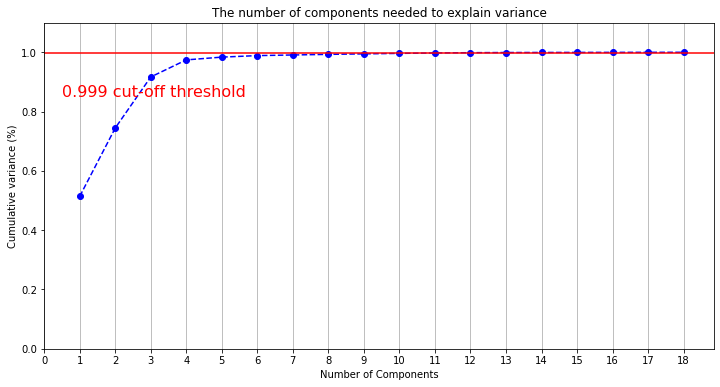

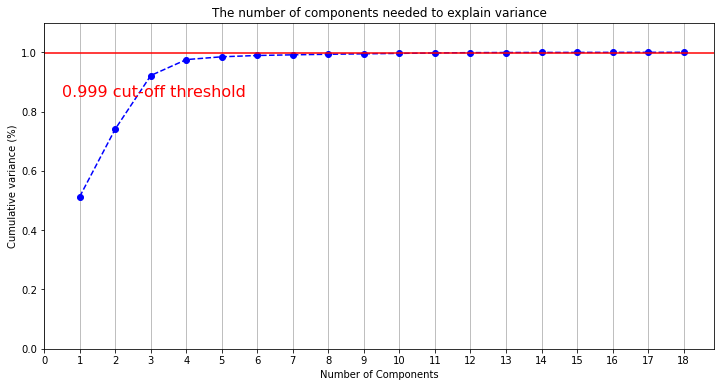

In [30]:
# Try PCA
from sklearn.preprocessing import MinMaxScaler
# Scale data
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
train_x = pca_script.do_pca(train_x, variance = 0.999)

test_x = scaler.fit_transform(test_x)
test_x = pca_script.do_pca(test_x, variance = 0.999)



In [31]:
# define baseline model
n_features = train_x.shape[1]
n_labels = train_y.shape[1]

def baseline_model():
    """ Multilayer perceptron model """
	# create model
    model = Sequential()
    model.add(Dense(10, input_dim=n_features, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(n_labels, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [32]:
model = baseline_model()
history = model.fit(train_x, train_y, epochs=150, batch_size=32, verbose =0)

In [33]:
loss, acc = model.evaluate(test_x, test_y, verbose=0)
print(f'Test Accuracy: {acc}')
print(f'Test Loss: {loss}')

Test Accuracy: 0.38877853751182556
Test Loss: 2.1205575466156006


# Plot Evaluation

In [13]:
def evalutaion_plot(string):
    # string = 'accuracy'
    plt.plot(history.history[string])
    plt.title
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.title(string.upper())
    plt.show()

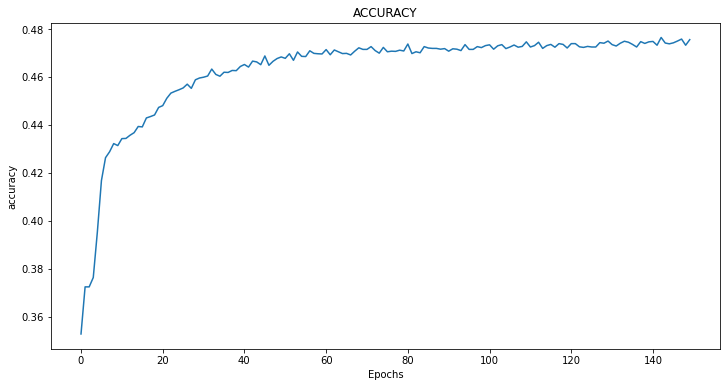

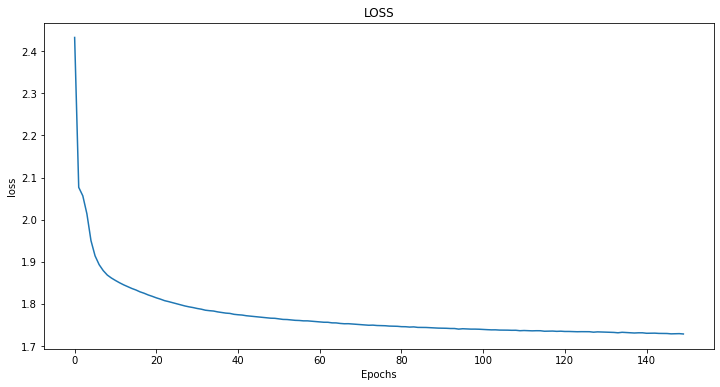

In [15]:
# Plot the changing accuracy
evalutaion_plot('accuracy')
evalutaion_plot('loss')
